### A Decadal Review of Enrollment Trends
# Tracking Domestic Enrollment Decline at USM: Is the Trend Reflecting Broader Shifts?

#### Executive Summary
This project explores university enrollment trends by race and ethnicity from 2015 to 2024 at three major public institutions in Mississippi: The University of Southern Mississippi (USM), Mississippi State University (MSU), and The University of Mississippi (Ole Miss). Using cleaned Common Data Set (CDS) data, we analyzed enrollment patterns among key demographic groups — White, Black or African American, Hispanic/Latino, and Non-resident students. 

The findings reveal notable declines in White and Black student enrollment at USM. Importantly, Black student enrollment has declined across all three institutions, indicating a statewide contraction in engagement among this demographic. Meanwhile, Hispanic and international student enrollment has steadily increased, potentially reflecting changing state demographics or shifts in university recruitment strategies. Understanding these shifts is essential for university policymakers, equity advocates, and students as they navigate a changing educational landscape.

In [229]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/Users/abhishekray/Documents/university_enrollment_by_race_2015_2024.csv"  
df = pd.read_csv(file_path)

# Clean data
df['Enrollment'] = pd.to_numeric(df['Enrollment'], errors='coerce')
df['Enrollment'] = df['Enrollment'].fillna(0)

# Define consistent color palette for universities
university_colors = {
    "University of Mississippi": "red",
    "Mississippi State University": "#5D1725",  # dark maroon
    "University of Southern Mississippi": "#DAA520"  # golden dark yellow
}

# Visualizing Enrollment Shifts: Tracking Racial Demographics at the University of Southern Mississippi.

In [230]:
# Function to summarize enrollment for a given university and race/ethnicity
def summarize_enrollment(university, race, dataframe):
    subset = dataframe[
        (dataframe['University'] == university) &
        (dataframe['Race/Ethnicity'] == race)
    ]

    enroll_2015 = subset[subset['Year'] == 2015]['Enrollment'].sum()
    enroll_2024 = subset[subset['Year'] == 2024]['Enrollment'].sum()
    net_change = enroll_2024 - enroll_2015
    percent_change = (net_change / enroll_2015) * 100 if enroll_2015 else 0

    summary = pd.DataFrame({
        '2015': [enroll_2015],
        '2024': [enroll_2024],
        'Net Change': [net_change],
        '% Change': [f"{percent_change:.1f}%"]
    })

    return summary


In [231]:
summarize_enrollment("University of Southern Mississippi", "White, non-Hispanic", df)


,2015,2024,Net Change,% Change
0,7179.0,5683.0,-1496.0,-20.8%


In [232]:
summarize_enrollment("University of Southern Mississippi", "Black or African American, non-Hispanic", df)


,2015,2024,Net Change,% Change
0,3530.0,2734.0,-796.0,-22.5%


In [233]:
summarize_enrollment("University of Southern Mississippi", "Hispanic/Latino", df)

,2015,2024,Net Change,% Change
0,365.0,497.0,132.0,36.2%


In [234]:
summarize_enrollment("University of Southern Mississippi", "Nonresidents", df)

,2015,2024,Net Change,% Change
0,127.0,482.0,355.0,279.5%


In [235]:
# Plot a single university and race
def plot_university_race(university, race):
    subset = df[
        (df['University'] == university) &
        (df['Race/Ethnicity'] == race)
    ].sort_values(by='Year')

    if subset.empty:
        print("No data available for this combination.")
        return

    color = university_colors.get(university, None)

    plt.figure(figsize=(8, 5))
    plt.plot(subset['Year'], subset['Enrollment'], marker='o', linestyle='-', color=color)
    plt.title(f"{race} Enrollment at {university} (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Enrollment")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

________________________________________________________________________________________________________

### Decline of White, Non-Hispanic Enrollment
White, non-Hispanic enrollment at USM declined steadily by about 21% over the past decade.

2015 enrollment: 7,179

2024 enrollment: 5,683

Net change: −1,496 students (~21% drop)

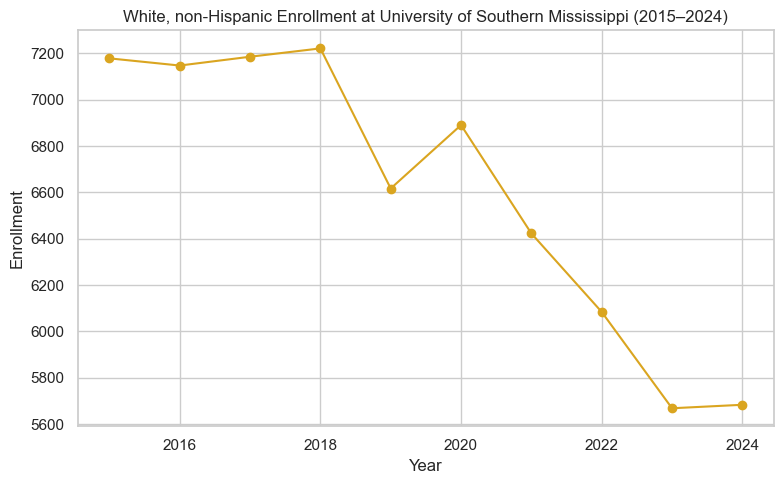

In [236]:
plot_university_race("University of Southern Mississippi", "White, non-Hispanic")

________________________________________________________________________________________________________

### Decline of Black, Non-Hispanic Enrollment
Black or African American enrollment at USM dropped by approximately 22.5% from 2015 to 2024.

2015 enrollment: 3,530

2024 enrollment: 2,734

Net change: −796 students (~22.5% drop)

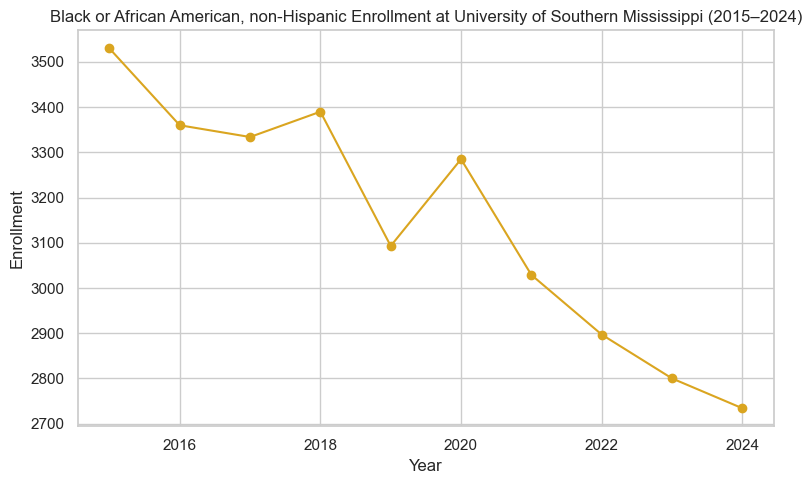

In [237]:
plot_university_race("University of Southern Mississippi", "Black or African American, non-Hispanic")

________________________________________________________________________________________________________

### Growth of Hispanic/Latino Enrollment
Hispanic/Latino enrollment increased by about 36% over the same period.

2015 enrollment: 365

2024 enrollment: 497

Net change: +132 students (~36% rise)

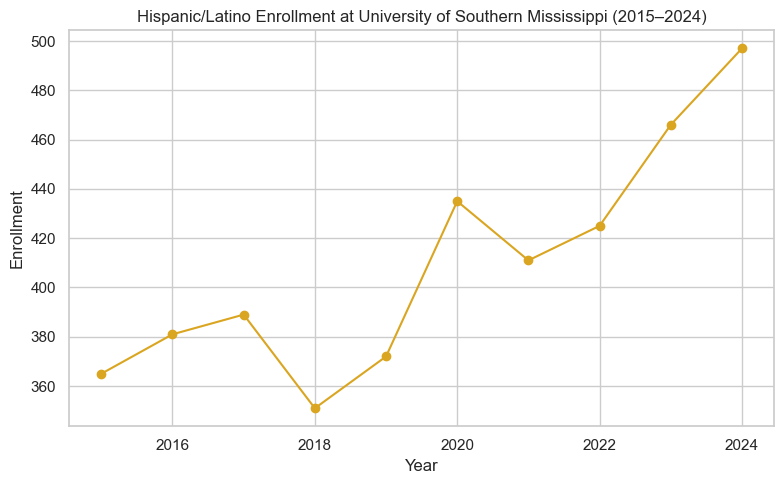

In [238]:
plot_university_race("University of Southern Mississippi", "Hispanic/Latino")

________________________________________________________________________________________________________

### Surge in Nonresident Enrollment
Nonresident (primarily international) student enrollment surged by 279%, with the sharpest growth after 2022.

2015 enrollment: 127

2024 enrollment: 482

Net change: +355 students (~279% increase)

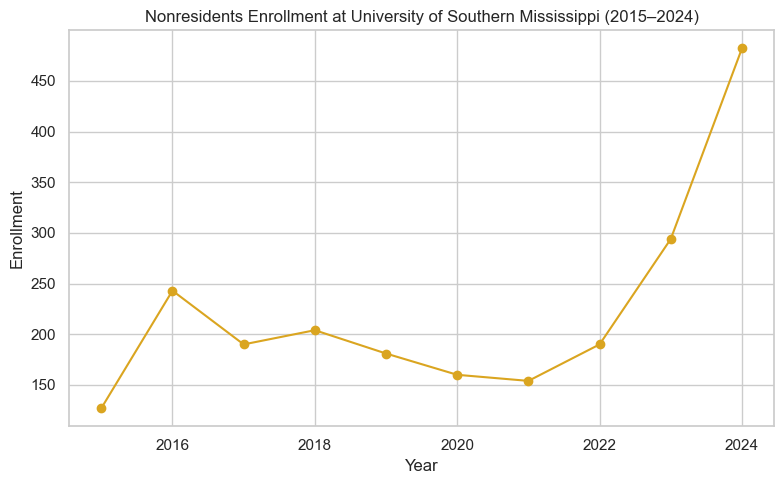

In [239]:
plot_university_race("University of Southern Mississippi", "Nonresidents")

________________________________________________________________________________________________________

# Total Enrollment Volume Trends at USM (2015–2024)

In [240]:
#  Function to plot total enrollment trend for a university
def plot_total_enrollment(university):
    subset = df[df['University'] == university]
    
    if subset.empty:
        print(f"No data available for {university}.")
        return

    trend = subset.groupby('Year')['Enrollment'].sum().reset_index()

    color = university_colors.get(university, 'blue')  

    plt.figure(figsize=(8, 5))
    plt.plot(trend['Year'], trend['Enrollment'], marker='o', linestyle='-', color=color)
    plt.title(f"Total Enrollment Trend at {university} (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Total Enrollment")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


________________________________________________________________________________________________________

In [241]:
# Function to summarize total enrollment for a given university (all races)
def summarize_total_enrollment(university, dataframe):
    subset = dataframe[dataframe['University'] == university]

    enroll_2015 = subset[subset['Year'] == 2015]['Enrollment'].sum()
    enroll_2024 = subset[subset['Year'] == 2024]['Enrollment'].sum()
    net_change = enroll_2024 - enroll_2015
    percent_change = (net_change / enroll_2015) * 100 if enroll_2015 else 0

    summary = pd.DataFrame({
        '2015': [int(enroll_2015)],
        '2024': [int(enroll_2024)],
        'Net Change': [int(net_change)],
        '% Change': [f"{percent_change:.1f}%"]
    })

    return summary


In [242]:
summarize_total_enrollment("University of Southern Mississippi", df)

,2015,2024,Net Change,% Change
0,11736,10096,-1640,-14.0%


________________________________________________________________________________________________________

### Decline in Total Enrollment at USM
Total student enrollment at the University of Southern Mississippi declined by nearly 14% over the past decade.

While individual racial groups (like Hispanic and nonresidents) saw increases, these gains did not offset the larger losses among White and Black domestic students.

This points to a net shrinkage in the student body, which may affect funding, staffing, and long-term strategic planning.

2015 enrollment: 11,736

2024 enrollment: 10,096

Net change: −1,640 students (~14% drop)

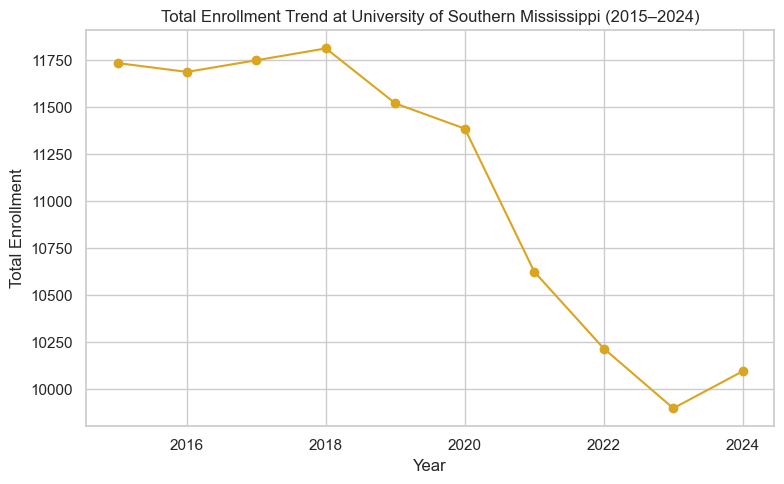

In [243]:
plot_total_enrollment("University of Southern Mississippi")


________________________________________________________________________________________________________

# Comparing Racial Enrollment Across Mississippi’s Public Universities

In [244]:
#  Plot comparison across universities for one race
def plot_race_all_universities(race):
    race_df = df[df['Race/Ethnicity'] == race]
    pivot_df = race_df.pivot(index='Year', columns='University', values='Enrollment')

    plt.figure(figsize=(10, 6))
    for university in pivot_df.columns:
        color = university_colors.get(university, None)
        plt.plot(pivot_df.index, pivot_df[university], marker='o', label=university, color=color)

    plt.title(f"{race} Enrollment Comparison Across Universities (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Enrollment")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [245]:
# Function to compare enrollment % change for a race across multiple universities
def compare_race_enrollment_across_universities(race, universities, dataframe):
    rows = []

    for uni in universities:
        subset = dataframe[
            (dataframe['University'] == uni) &
            (dataframe['Race/Ethnicity'] == race)
        ]

        enroll_2015 = subset[subset['Year'] == 2015]['Enrollment'].sum()
        enroll_2024 = subset[subset['Year'] == 2024]['Enrollment'].sum()
        net_change = enroll_2024 - enroll_2015
        percent_change = (net_change / enroll_2015) * 100 if enroll_2015 else 0

        rows.append({
            'University': uni,
            '2015 Enrollment': int(enroll_2015),
            '2024 Enrollment': int(enroll_2024),
            'Net Change': int(net_change),
            '% Change': f"{percent_change:.1f}%"
        })

    return pd.DataFrame(rows)


In [246]:
# Define list of universities
universities = [
    "University of Southern Mississippi",
    "Mississippi State University",
    "University of Mississippi"
]

# Call and print for each race
races = {
    "White, non-Hispanic": "White Enrollment Comparison",
    "Black or African American, non-Hispanic": "Black Enrollment Comparison",
    "Hispanic/Latino": "Hispanic Enrollment Comparison",
    "Nonresidents": "Nonresident Enrollment Comparison"
}

for race, label in races.items():
    comparison_df = compare_race_enrollment_across_universities(race, universities, df)
    print(f"\n {label}")
    print(comparison_df.to_string(index=False))



 White Enrollment Comparison
                        University  2015 Enrollment  2024 Enrollment  Net Change % Change
University of Southern Mississippi             7179             5683       -1496   -20.8%
      Mississippi State University            12051            13198        1147     9.5%
         University of Mississippi            14437            16673        2236    15.5%

 Black Enrollment Comparison
                        University  2015 Enrollment  2024 Enrollment  Net Change % Change
University of Southern Mississippi             3530             2734        -796   -22.5%
      Mississippi State University             3376             2835        -541   -16.0%
         University of Mississippi             2515             2049        -466   -18.5%

 Hispanic Enrollment Comparison
                        University  2015 Enrollment  2024 Enrollment  Net Change % Change
University of Southern Mississippi              365              497         132    36.2%
      M

________________________________________________________________________________________________________

### White, Non-Hispanic Enrollment Trends at USM, Ole Miss, and MSU (2015–2024)
While White, non-Hispanic enrollment at the University of Southern Mississippi (USM) declined by 20.8%, both Mississippi State University (MSU) and the University of Mississippi (Ole Miss) saw gains of 9.5% and 15.5% respectively over the same period.

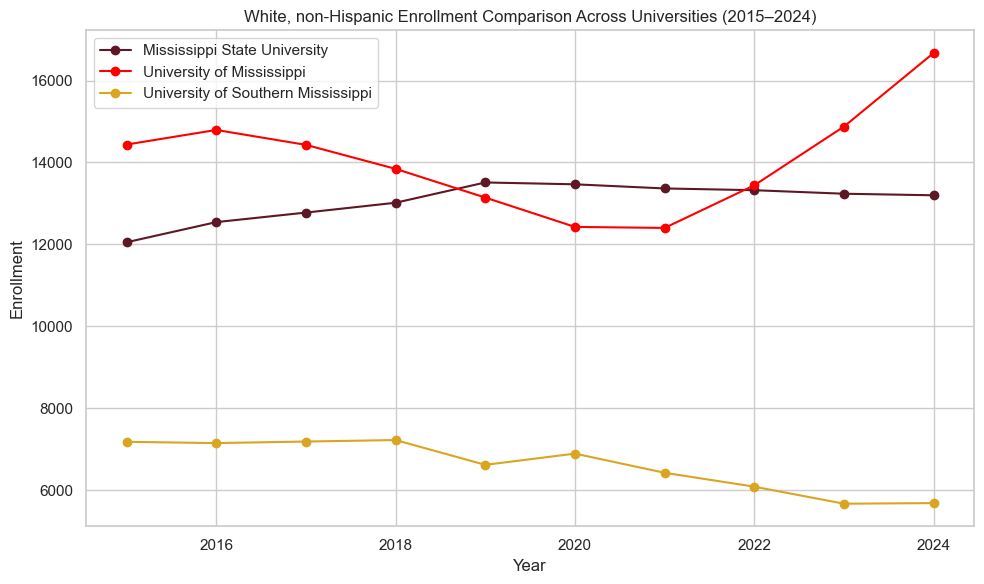

In [247]:
plot_race_all_universities("White, non-Hispanic")

________________________________________________________________________________________________________

### Black, Non-Hispanic Enrollment Trends at USM, Ole Miss, and MSU (2015–2024)
Black student enrollment declined by 22.5% at the University of Southern Mississippi (USM), with similarly significant decreases observed at Mississippi State University (MSU) and the University of Mississippi (Ole Miss), at 16.0% and 18.5% respectively—highlighting a broader statewide contraction in Black enrollment across public universities.

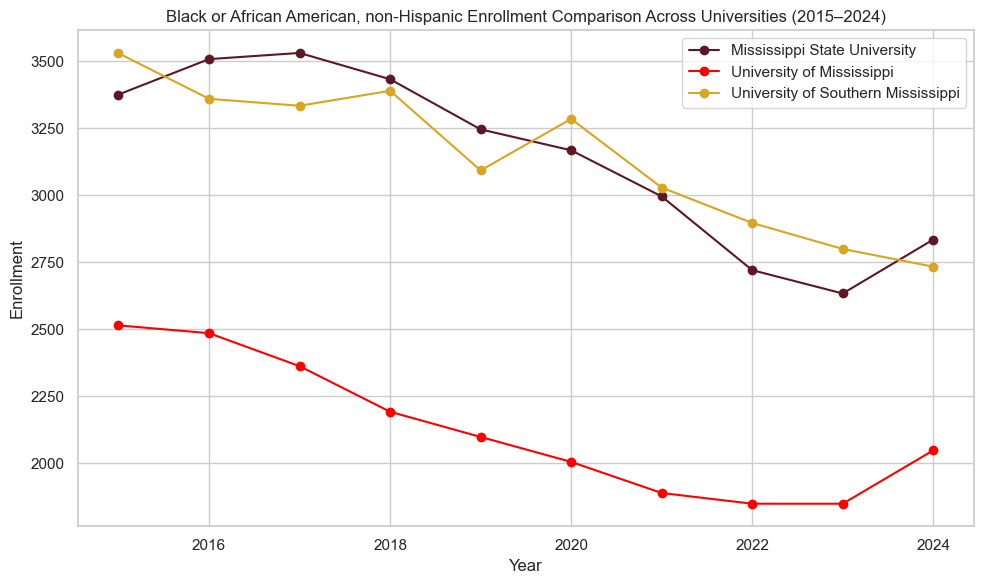

In [248]:
plot_race_all_universities("Black or African American, non-Hispanic")

________________________________________________________________________________________________________

### Hispanic/Latino Enrollment Trends at USM, Ole Miss, and MSU (2015–2024)

Hispanic enrollment at USM grew by 36.2%, but this increase was outpaced by much stronger growth at MSU and Ole Miss, which saw gains of 101.9% and 135.7%, respectively—signaling a significant and rising presence of Hispanic students across all three campuses.

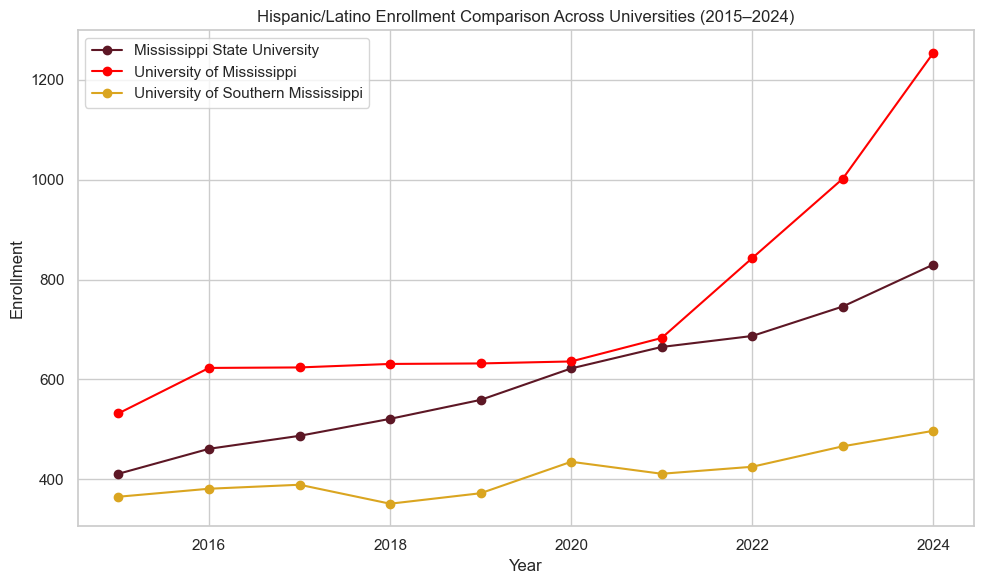

In [249]:
plot_race_all_universities("Hispanic/Latino")

________________________________________________________________________________________________________

### Nonresident (International) Enrollment Trends at USM, Ole Miss, and MSU (2015–2024)
Nonresident enrollment at USM surged by an extraordinary 279.5%, far outpacing MSU’s 13.5% increase. In contrast, Ole Miss saw a slight decline of 1.3%, making USM’s international recruitment strategy a distinct outlier among the three.

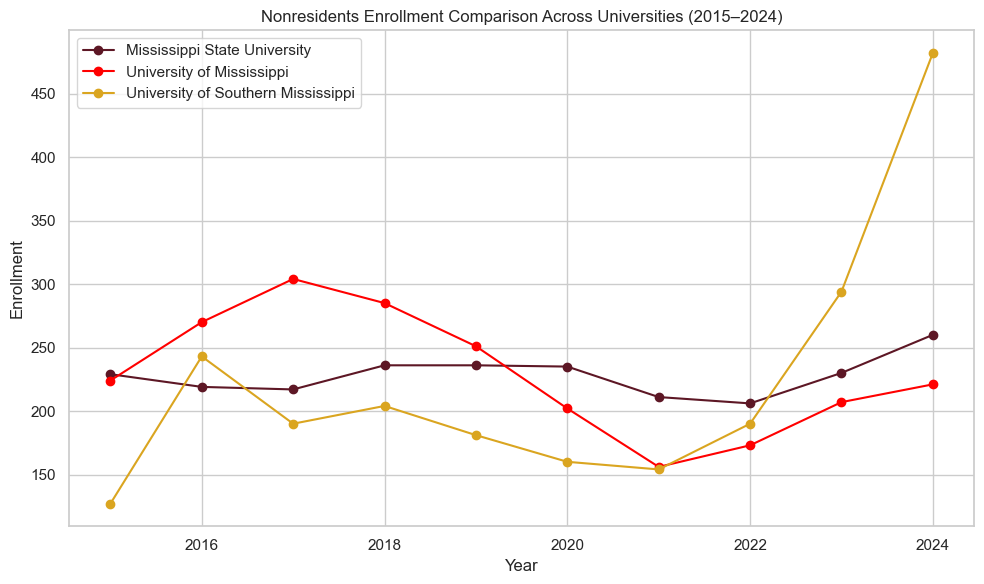

In [250]:
plot_race_all_universities("Nonresidents")

________________________________________________________________________________________________________

# Why Is Domestic Enrollment Declining at USM?

In [251]:
file_path = "/Users/abhishekray/Downloads/financial_aid_summary_2015_2024.csv"
df_aid = pd.read_csv(file_path)

In [252]:
def plot_total_need_based_aid():
    if 'Total_Need' not in df_aid.columns:
        print("Column 'Total_Need' not found in dataset.")
        return

    plt.figure(figsize=(8, 5))
    plt.plot(df_aid['Year'], df_aid['Total_Need'] / 1e6, marker='o', color='navy')
    plt.title("Total Need-Based Aid Trend (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Aid Amount (in millions USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Is Lower Enrollment Due to Reduced Financial Aid?
The data does not support the hypothesis that declining domestic enrollment at USM is the result of reduced financial aid. In fact, need-based aid increased steadily, rising from around 36.2 million in 2015 to 48.1 million dollars in 2024—a 32.9% growth over the decade. This consistent upward trend suggests that financial support became more generous, not more limited, during the period of enrollment decline.

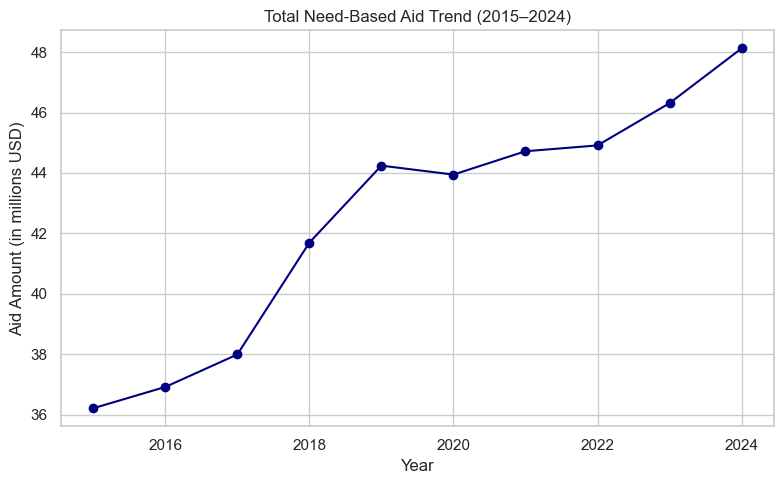

In [253]:
plot_total_need_based_aid()

________________________________________________________________________________________________________

In [254]:
# Load gender-based admissions data
file_path = "/Users/abhishekray/Documents/gender_admissions_decade.csv"  
df_gender = pd.read_csv(file_path)

# Convert numeric columns
df_gender['Applied'] = pd.to_numeric(df_gender['Applied'], errors='coerce')
df_gender['Admitted'] = pd.to_numeric(df_gender['Admitted'], errors='coerce')
df_gender['Enrolled'] = pd.to_numeric(df_gender['Enrolled'], errors='coerce')


In [255]:
def plot_admission_rate(university):
    subset = df_gender[df_gender['University'] == university].copy()
    if subset.empty:
        print(f"No data available for {university}.")
        return

    grouped = subset.groupby('Year').agg({
        'Applied': 'sum',
        'Admitted': 'sum'
    }).reset_index()

    grouped['Admission Rate'] = grouped['Admitted'] / grouped['Applied']

    plt.figure(figsize=(10, 5))
    plt.plot(grouped['Year'], grouped['Admission Rate'] * 100, marker='o', color='green')
    plt.title(f"Admission Rate Trend at {university} (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Admission Rate (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


________________________________________________________________________________________________________

### Is Lower Enrollment Due to Strict Admission Process?
The data clearly does not support the hypothesis that a stricter admissions process led to the decline in domestic enrollment. In fact, USM became more accessible, with admission rates rising from 58% in 2015 to nearly 100% in recent years starting from 2017.

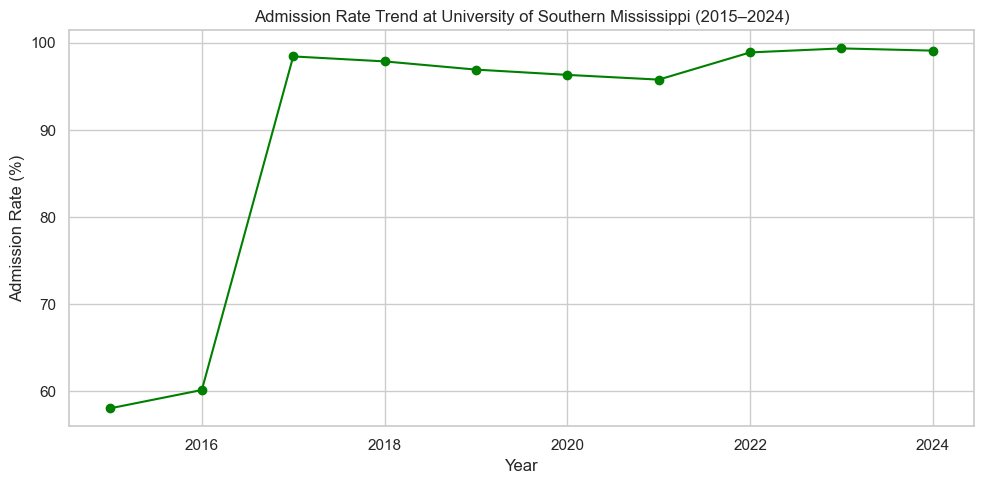

In [256]:
plot_admission_rate("University of Southern Mississippi")

________________________________________________________________________________________________________

In [257]:
def plot_yield_rate(university):
    subset = df_gender[df_gender['University'] == university].copy()
    if subset.empty:
        print(f"No data available for {university}.")
        return

    grouped = subset.groupby('Year').agg({
        'Admitted': 'sum',
        'Enrolled': 'sum'
    }).reset_index()

    grouped['Yield Rate'] = grouped['Enrolled'] / grouped['Admitted']

    plt.figure(figsize=(10, 5))
    plt.plot(grouped['Year'], grouped['Yield Rate'] * 100, marker='s', color='orange')
    plt.title(f"Yield Rate Trend at {university} (2015–2024)")
    plt.xlabel("Year")
    plt.ylabel("Yield Rate (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

###  Is Lower Enrollment Due to Falling Yield Rate?
The data strongly suggests that declining domestic enrollment at USM is tied to a sharp drop in yield rate—the percentage of admitted students who actually choose to enroll. Yield fell from 43.5% in 2015 to just 25.0% in 2024, indicating that while students are being admitted at record rates, fewer are choosing to attend. This trend points to issues of perceived value, campus appeal, or competition, rather than access.

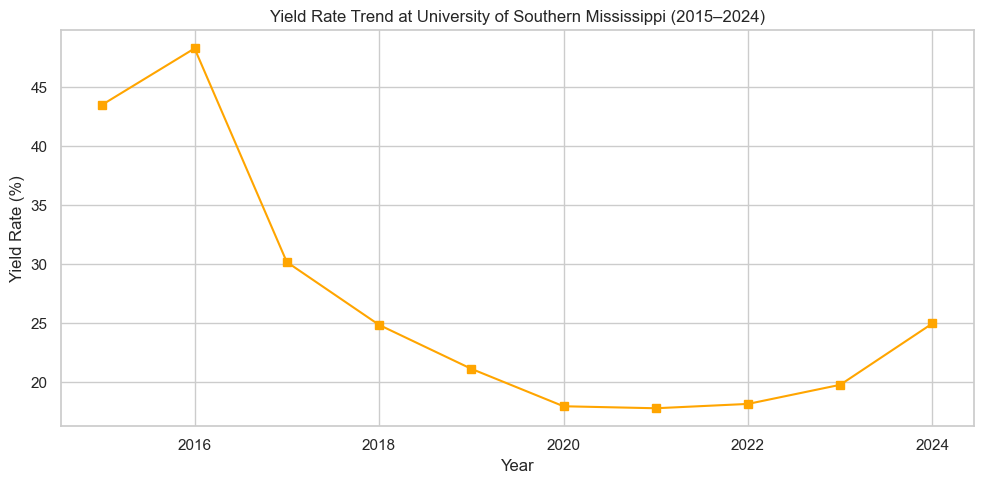

In [258]:
plot_yield_rate("University of Southern Mississippi")

________________________________________________________________________________________________________

# Findings: Understanding Declining Domestic Enrollment at USM

Over the past decade, enrollment trends at Mississippi's top public universities suggest a demographic pivot. The University of Southern Mississippi has seen a significant decline in domestic enrollment — with White student numbers falling by over 20% and Black student enrollment dropping by 22.5%. Notably, this decline in Black student enrollment is not isolated to USM, but is mirrored at Mississippi State and Ole Miss, suggesting a broader, systemic decline in Black enrollment across the state’s flagship public universities.

At the same time, Hispanic/Latino and non-resident enrollment is increasing, signaling a shift in recruitment patterns and possibly reflecting broader demographic changes.

Importantly, this decline cannot be explained by reductions in need-based financial aid, as such aid has actually increased steadily over the decade. Nor can it be attributed to rising admissions competitiveness — admission rates remain relatively nearly 100 percent, indicating that selectivity is not a barrier.

This points to deeper forces at play: regional population changes, shifts in perceived value of college, or changes in student sentiment. Future research could explore survey-based data on student decision-making, or even program-level breakdowns to see where losses or gains are concentrated.

Ultimately, these trends are more than numbers — they tell a story about who is choosing higher education in Mississippi, and who isn’t — and why.